# Object Detection

In this notebook, I have used a variety of Object-Detection OpenCV functions, some of which are (in order):
1. Template Matching
2. Corner Detection: a) Corner Harris, b) Shi Tomasi
3. Edge Detection: Canny Edge detector
4. Finding contours using cv2.findContours()
5. Feature Matching using (brute force) ORB and SIFT (not supported anymore)
6. Image Segmentation using contouring
7. Image Segmentation using Watershed Algorithm
8. Face and eye detection using downloaded cascade-classifier xml files

## Template Matching

Template matching will work if we know for sure that smaller image is actually present in the larger one. We can find it using this method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

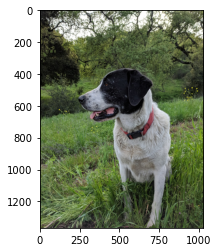

In [2]:
full_image = cv2.imread('./DATA/sammy.jpg')
full_image = cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB)
plt.imshow(full_image)

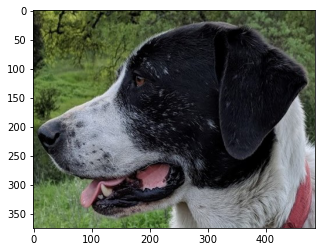

In [3]:
face = cv2.imread('./DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [4]:
# Eval function: Convert a string to a python named function.
my_func_string = "sum"
my_func = eval(my_func_string)
my_func([1, 2, 4])

7

#### All the methods that are used for template matching

In [5]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [6]:
a = np.ones((5,5,5))
a[2][4][3] = 10
# np.argwhere RETURNS the Row-Column index of predicate inside the function
np.argwhere(a == np.max(a))
# Notice it is a 2D array. So the index here is: ans[0][0], ans[0][1], ans[0][2]

array([[2, 4, 3]], dtype=int64)

### Testing all methods for template matching

(-735580608.0, 1755388672.0, (0, 10), (231, 345))


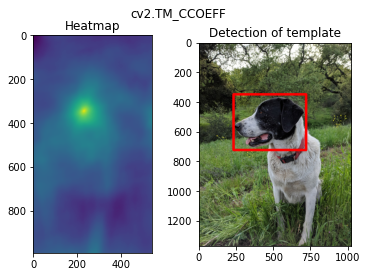

(-0.32965779304504395, 0.9982755780220032, (0, 14), (231, 345))


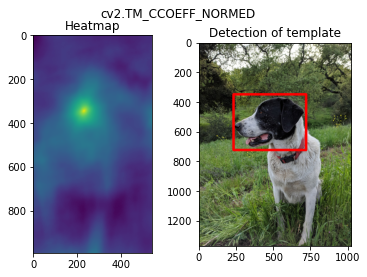

(2240523776.0, 5224793600.0, (66, 212), (335, 656))


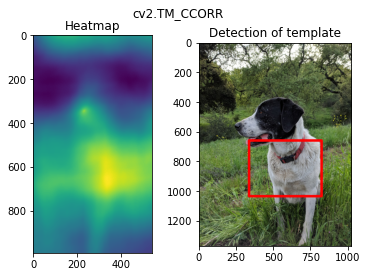

(0.4976869225502014, 0.9993349313735962, (0, 53), (231, 345))


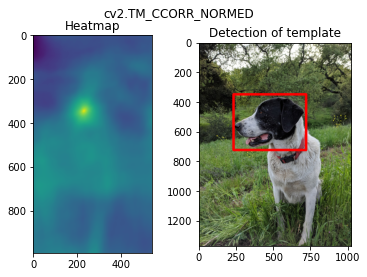

(6403460.0, 6297628672.0, (231, 345), (0, 0))


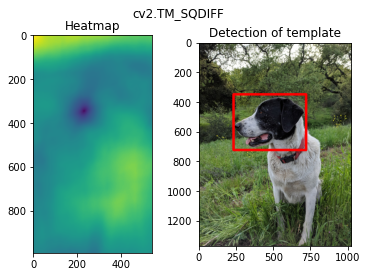

(0.001331940176896751, 1.0, (231, 345), (0, 0))


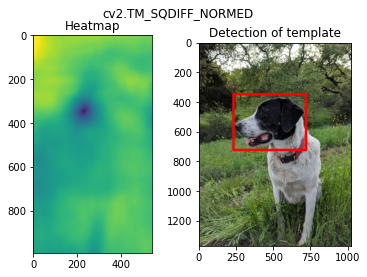

In [7]:
for method in methods:
    full_copy = full_image.copy()
    func = eval(method)
    res = cv2.matchTemplate(full_copy, face, func)
    
    tuple_res = cv2.minMaxLoc(res)
    print(tuple_res)
    # NOTICE THE FORMAT FOR cv2.minMaxLoc(image)
    min_val, max_val, min_location, max_location = tuple_res
    
    # For SQDIFF, the heatmap is opposite, so, it reports the min_location as top_left.
    if(func == cv2.TM_SQDIFF or func == cv2.TM_SQDIFF_NORMED):
        top_left = min_location
    else:
        top_left = max_location
    
    height, width, channels = face.shape
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    # Draw the rectangle to depict where the image was matched
    cv2.rectangle(full_copy, top_left, bottom_right, color = (255, 0, 0), thickness = 15)
    
    plt.subplot(1, 2, 1)
    plt.title('Heatmap')    
    plt.imshow(res)
    
    plt.subplot(1, 2, 2)
    plt.title('Detection of template')
    plt.imshow(full_copy)
    
    plt.suptitle(method)
    
    plt.show()

#### The hottest point on the heatmap is the top left corner of the possible face found.

## Corner Detection

### 1. Corner Harris

In [10]:
chess = cv2.cvtColor(cv2.imread('./DATA/flat_chessboard.png'), cv2.COLOR_BGR2RGB)

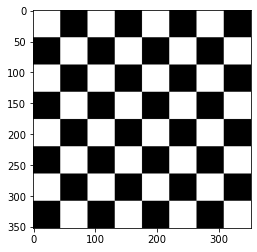

In [11]:
chess_gray = cv2.cvtColor(cv2.imread('./DATA/flat_chessboard.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(chess_gray, cmap = 'gray')

In [13]:
real_chess = cv2.cvtColor(cv2.imread('./DATA/real_chessboard.jpg'), cv2.COLOR_BGR2RGB)

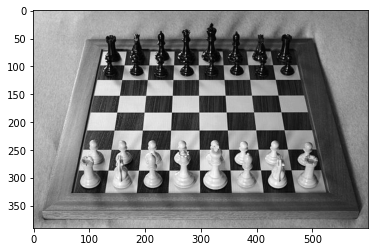

In [14]:
real_chess_gray = cv2.cvtColor(cv2.imread('./DATA/real_chessboard.jpg'), cv2.COLOR_BGR2GRAY)
plt.imshow(real_chess_gray, cmap = 'gray')

In [15]:
chess_gray = np.float32(chess_gray)

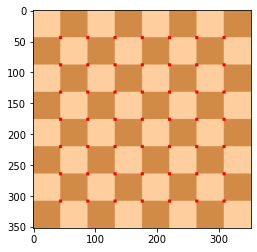

In [16]:
dst = cv2.cornerHarris(chess_gray, blockSize = 2, ksize = 3, k = 0.04)
# We can dilate for better view
dst = cv2.dilate(dst, None)
chess[dst > 0.01 * dst.max()] = [255, 0, 0]

plt.imshow(chess)

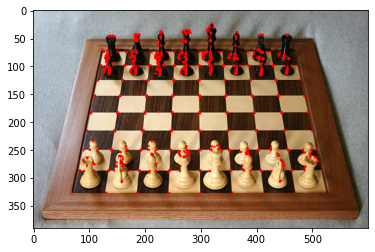

In [17]:
real_chess_gray = np.float32(real_chess_gray)
dst = cv2.cornerHarris(real_chess_gray, blockSize = 2, ksize = 3, k = 0.04)
dst = cv2.dilate(dst, None)
real_chess[dst > 0.01 * dst.max()] = [255, 0, 0]

plt.imshow(real_chess)

### 2. Shi Tomasi ("good features to track")

In [18]:
chess = cv2.cvtColor(cv2.imread('./DATA/flat_chessboard.png'), cv2.COLOR_BGR2RGB)
chess_gray = cv2.cvtColor(cv2.imread('./DATA/flat_chessboard.png'), cv2.COLOR_BGR2GRAY)
real_chess = cv2.cvtColor(cv2.imread('./DATA/real_chessboard.jpg'), cv2.COLOR_BGR2RGB)
real_chess_gray = cv2.cvtColor(cv2.imread('./DATA/real_chessboard.jpg'), cv2.COLOR_BGR2GRAY)

In [25]:
corners = cv2.goodFeaturesToTrack(chess_gray, maxCorners = 10, qualityLevel = 0.01, minDistance = 10)
print(type(corners))
print(corners)

<class 'numpy.ndarray'>
[[[308. 308.]]

 [[264. 308.]]

 [[220. 308.]]

 [[176. 308.]]

 [[132. 308.]]

 [[ 88. 308.]]

 [[ 44. 308.]]

 [[308. 264.]]

 [[264. 264.]]

 [[220. 264.]]]


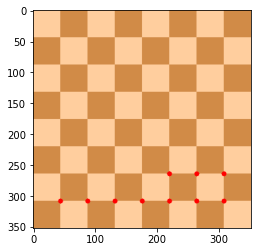

In [23]:
for i in corners:
    point = i[0]
    cv2.circle(chess, (int(i[0][0]), int(i[0][1])), 4, color = (255, 0, 0), thickness = -1)

plt.imshow(chess)

Above, we set maxCorners to only 10.

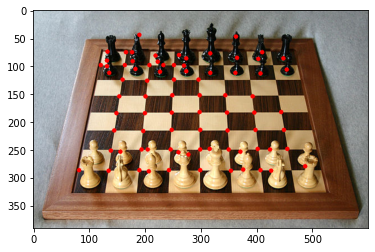

In [24]:
corners = cv2.goodFeaturesToTrack(real_chess_gray, maxCorners = 80, qualityLevel = 0.01, minDistance = 10)

for i in corners:
    point = i[0]
    cv2.circle(real_chess, (int(i[0][0]), int(i[0][1])), 4, color = (255, 0, 0), thickness = -1)

plt.imshow(real_chess)

## Edge Detection

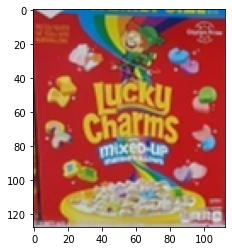

In [26]:
img = cv2.cvtColor(cv2.imread('./DATA/lucky_charms.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Canny Edge detector; Direct, no updates:

In [27]:
# cv2.Canny()
edges = cv2.Canny(img, threshold1 = 127, threshold2 = 127)

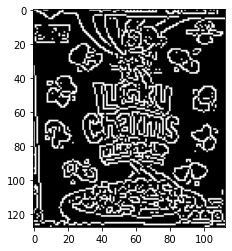

In [28]:
plt.imshow(edges, cmap = 'gray')

#### Choosing thresholds in a better way, instead of 127, 127:

In [29]:
# A GOOD WAY TO CHOOSE THRESH1, THRESH2 FOR CANNY ALGORITHM
median = np.median(img)
# THRESH1 = 70% of the median value (30% less)
thresh1 = max(0, int(0.7 * median))
# THRESH2 = 130% of the median value (30% more)
thresh2 = min(255, int(1.3 * median))

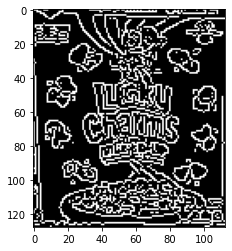

In [30]:
edges = cv2.Canny(img, threshold1 = thresh1, threshold2 = thresh2)
plt.imshow(edges, cmap = 'gray')

#### Usually, its best to blur on our own as well, before

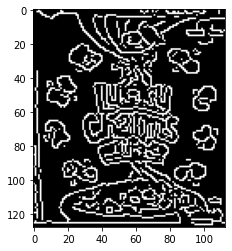

In [32]:
blurred_img = cv2.blur(img, ksize = (3, 3))
edges = cv2.Canny(blurred_img, threshold1 = thresh1, threshold2 = thresh2)
plt.imshow(edges, cmap = 'gray')

In [ ]:
# Chessboard Corner Grid Detection

# Contour Detection

Countour detection basically involves detecting a "foreground" and a "background", and also detection of external and internal contours

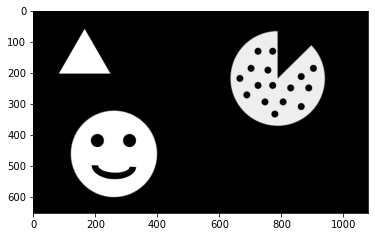

In [34]:
img = cv2.imread('./DATA/internal_external.png', 0)
plt.imshow(img, cmap = 'gray')

The following cell is standard contour finding code

In [36]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
print(type(contours))
print(contours)

<class 'list'>
[array([[[247, 322]],

       [[246, 323]],

       [[240, 323]],

       [[239, 324]],

       [[233, 324]],

       [[232, 325]],

       [[229, 325]],

       [[228, 326]],

       [[225, 326]],

       [[224, 327]],

       [[221, 327]],

       [[220, 328]],

       [[218, 328]],

       [[217, 329]],

       [[215, 329]],

       [[214, 330]],

       [[213, 330]],

       [[212, 331]],

       [[210, 331]],

       [[209, 332]],

       [[207, 332]],

       [[206, 333]],

       [[205, 333]],

       [[204, 334]],

       [[203, 334]],

       [[202, 335]],

       [[201, 335]],

       [[200, 336]],

       [[198, 336]],

       [[197, 337]],

       [[196, 337]],

       [[195, 338]],

       [[194, 338]],

       [[192, 340]],

       [[191, 340]],

       [[190, 341]],

       [[189, 341]],

       [[187, 343]],

       [[186, 343]],

       [[185, 344]],

       [[184, 344]],

       [[182, 346]],

       [[181, 346]],

       [[178, 349]],

       [[177, 34

In [39]:
print(type(hierarchy[0]))
print(hierarchy)

<class 'numpy.ndarray'>
[[[ 4 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [-1  2 -1  0]
  [21  0  5 -1]
  [ 6 -1 -1  4]
  [ 7  5 -1  4]
  [ 8  6 -1  4]
  [ 9  7 -1  4]
  [10  8 -1  4]
  [11  9 -1  4]
  [12 10 -1  4]
  [13 11 -1  4]
  [14 12 -1  4]
  [15 13 -1  4]
  [16 14 -1  4]
  [17 15 -1  4]
  [18 16 -1  4]
  [19 17 -1  4]
  [20 18 -1  4]
  [-1 19 -1  4]
  [-1  4 -1 -1]]]


#### External Contours == -1

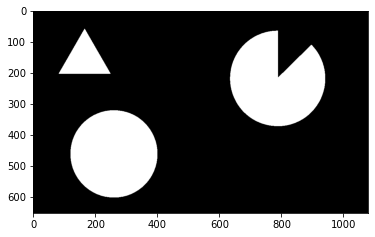

In [40]:
external_contours = np.zeros(img.shape)
for i in range(len(contours)):
    # External Contours == -1
    if(hierarchy[0][i][3] == -1): # First index is always 0 as hierarchy[1] gives an error
        cv2.drawContours(external_contours, contours = contours, contourIdx = i, color = 255, thickness = -1)

plt.imshow(external_contours, cmap = 'gray')

#### Internal Contours != -1

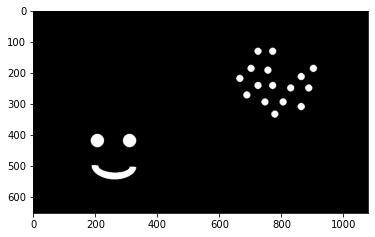

In [41]:
internal_contours = np.zeros(img.shape)

for i in range(len(contours)):
    
    # Internal Contours, not equal to -1
    if(hierarchy[0][i][3] != -1):
        cv2.drawContours(internal_contours, contours = contours, contourIdx = i, color = 255, thickness = -1)
        
plt.imshow(internal_contours, cmap = 'gray')

Each positive number for hierarchy[0][i][3] points to a different "group". Here 0 points to the contour formed by the smiley face

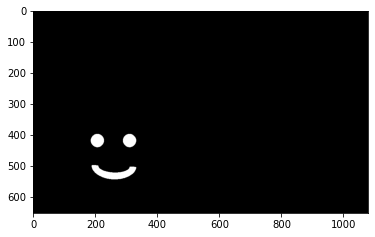

In [42]:
internal_contours = np.zeros(img.shape)

for i in range(len(contours)):
    
    # Internal Contours, not equal to -1
    if(hierarchy[0][i][3] == 0):
        cv2.drawContours(internal_contours, contours = contours, contourIdx = i, color = 255, thickness = -1)
        
plt.imshow(internal_contours, cmap = 'gray')

## Feature Matching

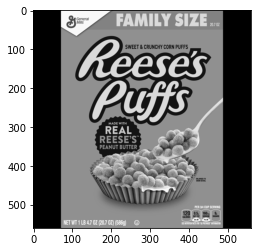

In [43]:
cereal_box = cv2.imread('./DATA/reeses_puffs.png')
cereal_box = cv2.cvtColor(cereal_box, cv2.COLOR_BGR2GRAY)
plt.imshow(cereal_box, cmap = 'gray')

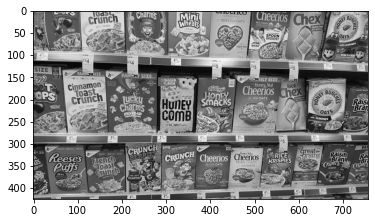

In [44]:
cereal_row = cv2.imread('./DATA/many_cereals.jpg')
cereal_row = cv2.cvtColor(cereal_row, cv2.COLOR_BGR2GRAY)
plt.imshow(cereal_row, cmap = 'gray')

### Brute force with ORB detectors

In [45]:
# Creating detection object which detects "features"
orb = cv2.ORB_create()
keypoints_box, descriptors_box = orb.detectAndCompute(cereal_box, mask = None)
keypoints_row, descriptors_row = orb.detectAndCompute(cereal_row, mask = None)

In [46]:
brute_force = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

#### Creating the matches object returned by .match() method

In [47]:
matches = brute_force.match(descriptors_box, descriptors_row)

# Sort the match objects, A better match has a lower distance value.
matches = sorted(matches, key = lambda x : x.distance)

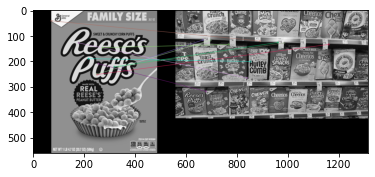

In [48]:
drawn = cv2.drawMatches(cereal_box, keypoints_box, cereal_row, keypoints_row, matches[:10], None, flags = 2)
plt.imshow(drawn)

A pretty bad result. Use some other algorithm

### SIFT (No longer works but here is the code):

In [ ]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1, des2, k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# Ratio Test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < (0.7 * match2.distance):
        matchesMask[i]=[1, 0]

draw_params = dict(matchColor = (0, 255, 0),
                   singlePointColor = (255, 0, 0),
                   matchesMask = matchesMask,
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)

## Image segmentation using contouring

In [49]:
def show_img(img):
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(111)
    ax.imshow(img)
    
def show_gray(img):
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

In [50]:
coins = cv2.imread('./DATA/pennies.jpg')

### Step1: Blur

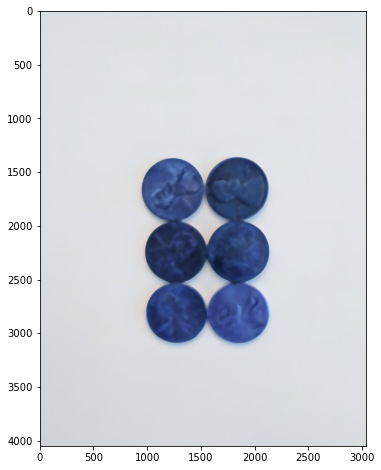

In [51]:
coins_blur = cv2.medianBlur(coins, 35) # Huge kernel size because notice how big the image is
show_img(coins_blur)

### Step2: Convert to grayscale

In [52]:
gray_blurred = cv2.cvtColor(coins_blur, cv2.COLOR_BGR2GRAY)

### Step3: Apply binary threshold

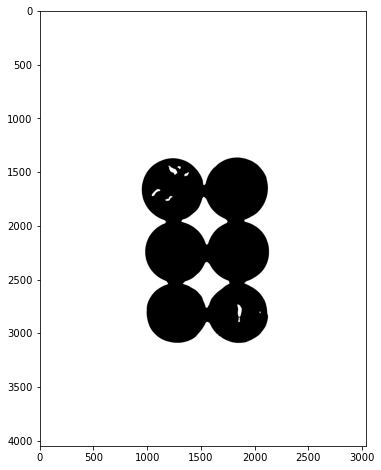

In [53]:
# Binary Inv to make coins-> background as an external contour
ret, thresh_img = cv2.threshold(gray_blurred, 127, 255, cv2.THRESH_BINARY) 
show_gray(thresh_img)

Note: Doing BINARY_INV thresholding, makes coins white (they were initially black), and the we need to use External contouring: i.e, hierarchy[0][i][3] == -1.
But we can also use BINARY, keeping original colors, and then we use Internal contouring:
i.e, hierarchy[0][i][3] != -1

### Step4: Contouring and draw the contours to see the segmentation

In [54]:
contours, hierarchy = cv2.findContours(thresh_img.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [55]:
for i in range(len(contours)):
    
    # Internal contour
    if(hierarchy[0][i][3] != -1):
        cv2.drawContours(coins, contours, i, (255, 0, 0), 25)
        
    # External contour, IFF we used BINARY_INV thresholding
    # if(hierarchy[0][i][3] == -1):
    #    cv2.drawContours(coins, contours, i, (255, 0, 0), 25)

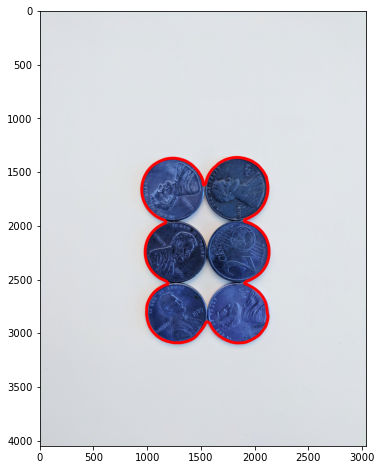

In [56]:
show_img(coins)

Note that contouring is simply blobbing the coins together as one entity, instead of showing us 6 different separations. So we will better like to use the Watershed Algorithm

# Watershed Algorithm: Steps

### Read Image

In [57]:
coins = cv2.imread('DATA/pennies.jpg')

### Blur image, like Median Blur

In [58]:
coins = cv2.medianBlur(coins, 35)

### Convert to grayscale

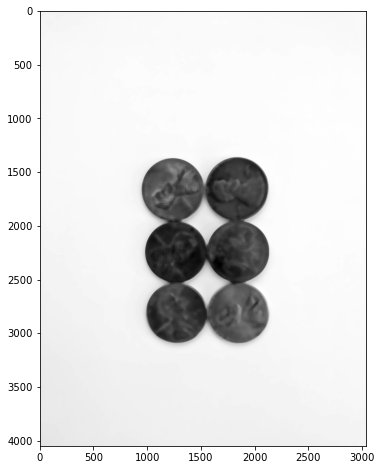

In [59]:
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_gray = np.uint8(coins_gray)
show_gray(coins_gray)

### Binary thresholding

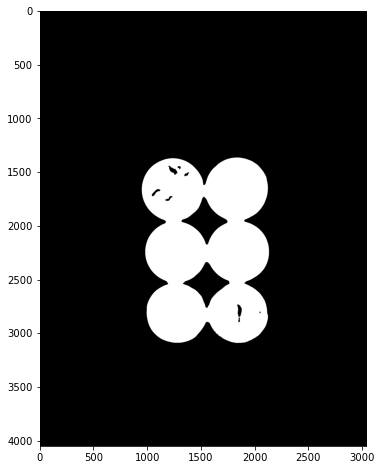

In [60]:
# Normal Binary Inv thresholding: 
ret, thresh_img = cv2.threshold(coins_gray, 127, 255, cv2.THRESH_BINARY_INV)
show_gray(thresh_img)

Notice the little bits of noise inside the image, we can use a better threshold, called OTSU as follows:

### We can use OTSU for a better threshold

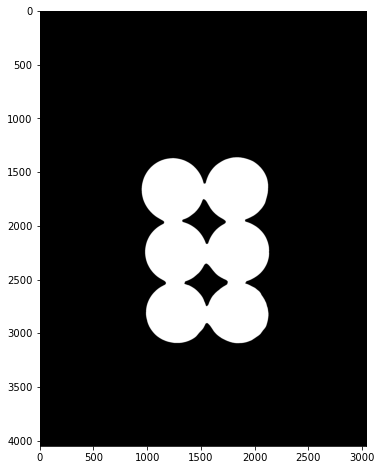

In [61]:
# OTSU
ret, thresh_img = cv2.threshold(coins_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
show_gray(thresh_img)

#### Optional Noise removal using morph operator: Opening

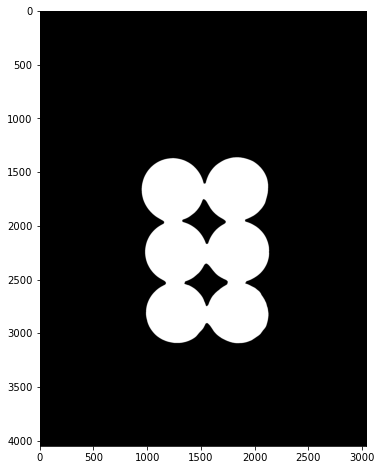

In [62]:
# Noise removal
kernel = np.ones((4, 4), np.uint8)

opening = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, kernel, iterations = 5)
show_gray(thresh_img)

### Grab what is surely the background, using Dilate

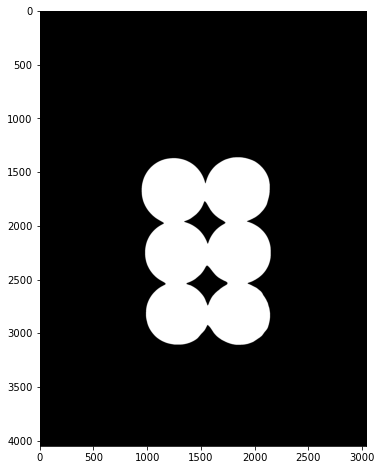

In [63]:
# Grab background, dilate THE OPENING created earlier.
sure_background = cv2.dilate(opening, kernel, iterations = 5)
show_gray(sure_background)

### Apply distance transform

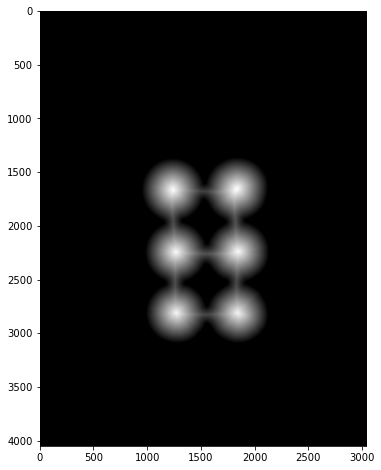

In [64]:
# Distance transform
dist_trans = cv2.distanceTransform(thresh_img, cv2.DIST_L2, maskSize = 5)
show_gray(dist_trans)

### Now, threshold this again, to get what is Surely the Foreground

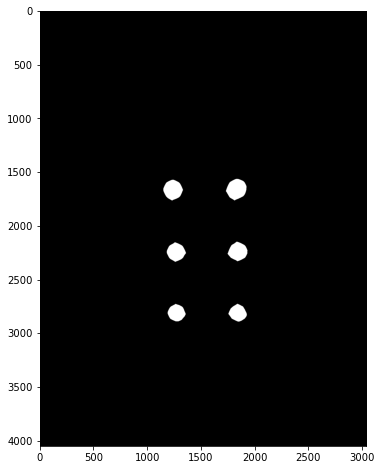

In [65]:
ret, dist_trans_thresh = cv2.threshold(dist_trans, 0.7 * dist_trans.max(), 255, cv2.THRESH_BINARY)
show_gray(dist_trans_thresh)

#### Make sure to make both uint8's

In [66]:
sure_foreground = np.uint8(dist_trans_thresh)
sure_background = np.uint8(sure_background)

### Retrieve unknown region, not sure if fore or back ground

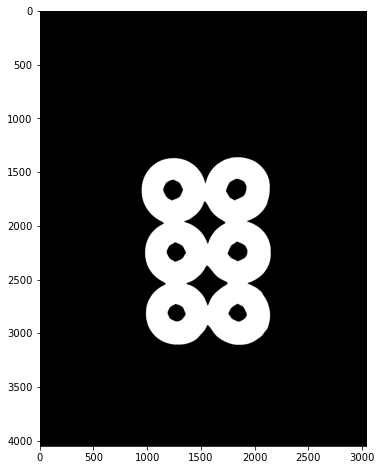

In [67]:
# Unknown region (not sure if foreground or background)
unknown_region = cv2.subtract(sure_background, sure_foreground)
show_gray(unknown_region)

### Create the markers/ Seeds for Watershed

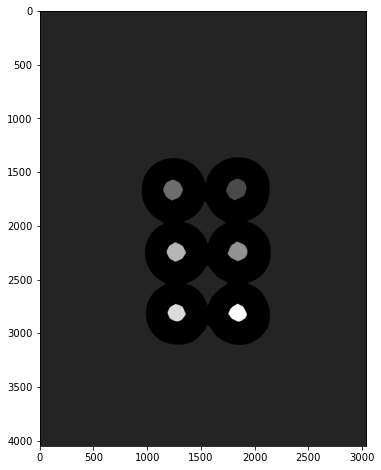

In [68]:
# Create label markers/seeds to start search for Watershed algorithm
ret, markers = cv2.connectedComponents(sure_foreground)
markers = markers + 1
markers[unknown_region == 255] = 0
show_gray(markers)

### Apply the watershed on the original image, with reference to the marker created above

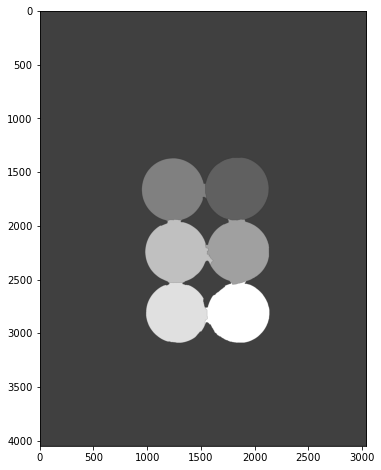

In [69]:
markers = cv2.watershed(coins, markers)
show_gray(markers)

Above, we have our final output. All that is left is to contour it and draw the boundaries

### Draw contours on this, to finally map the segments

In [70]:
contours, hierarchy = cv2.findContours(markers, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if(hierarchy[0][i][3] == -1):
        cv2.drawContours(coins, contours, i, (255, 0, 0), 30)

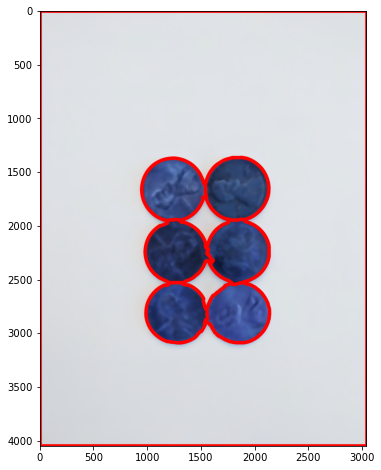

In [71]:
show_gray(coins)

Checkout Watershed Demo.ipynb for an interactive demo

# Face Detection

In [72]:
nadia = cv2.imread('./DATA/Nadia_Murad.jpg', 0)
denis = cv2.imread('./DATA/Denis_Mukwege.jpg', 0)
solvay = cv2.imread('./DATA/solvay_conference.jpg', 0)

In [73]:
# Note, that we use ", 0" because cv2.COLOR_BGR2GRA evaluates to 0. Also, cv2.COLOR_BGR2GRAY is actually 6
print(cv2.COLOR_BGR2BGRA)

0


### Load the CascadeClassifier xml file

In [74]:
face_cascade_classifier = cv2.CascadeClassifier('./DATA/haarcascades/haarcascade_frontalface_default.xml')

In [75]:
def detect_face(img):
    face_img = img.copy()
    
    # detectMultiScale
    face_rectangles = face_cascade_classifier.detectMultiScale(face_img)
    
    # Draw Rectangles
    for (x, y, w, h) in face_rectangles:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), color = (255, 255, 255), thickness = 15)
    
    return face_img

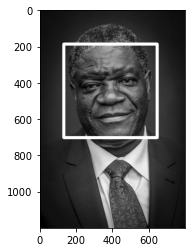

In [76]:
result = detect_face(denis)
plt.imshow(result, cmap = 'gray')

In [77]:
# Useful if there are lots of faces
def adjusted_detect_face(img):
    face_img = img.copy()
    
    face_rectangles = face_cascade_classifier.detectMultiScale(face_img, scaleFactor = 1.2, minNeighbors = 5)
    
    for (x, y, w, h) in face_rectangles:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), color = (255, 255, 255), thickness = 10)
    
    return face_img

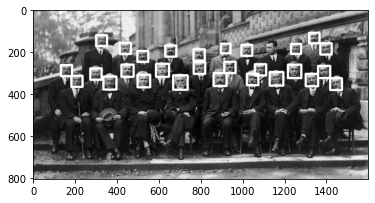

In [78]:
result = adjusted_detect_face(solvay)
plt.imshow(result, cmap = 'gray')

In [79]:
eyes_cascade_classifier = cv2.CascadeClassifier('./DATA/haarcascades/haarcascade_eye.xml')
# For eye detection, we can use the EXACT same function as adjusted_face_detect, for brevity, we can change "face" to "eyes"
# but everything else is the same

In [80]:
def adjusted_detect_eyes(img):
    face_img = img.copy()
    
    eyes_rectangles = eyes_cascade_classifier.detectMultiScale(face_img, scaleFactor = 1.2, minNeighbors = 5)
    
    for (x, y, w, h) in eyes_rectangles:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), color = (255, 255, 255), thickness = 10)
    
    return face_img

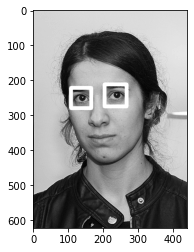

In [81]:
result = adjusted_detect_eyes(nadia)
plt.imshow(result, cmap = 'gray')

### Live webcam video face detector 

The following code detects and draws a rectangle around any faces detected during a live recording from webcam

In [82]:
import cv2

cap = cv2.VideoCapture(0)

while(True):
    
    ret, frame = cap.read()
    frame = adjusted_detect_face(frame)
    
    cv2.imshow('Video Face detect', frame)
    
    if(cv2.waitKey(10) & 0xFF == 27):
        break
        
cap.release()
cv2.destroyAllWindows()